In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")


1.1 DATA INFO

In [2]:
# 0. Load Data
# Load dataset (adjust the filename accordingly)
df = pd.read_csv("../data/falls.csv", delimiter=",")  # If the delimiter is different, adjust accordingly

# Check dataset size (number of rows and columns)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Check column names, data types, and missing values
df.info()


Number of rows: 40000
Number of columns: 45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   fallen                                            40000 non-null  bool   
 1   id                                                40000 non-null  int64  
 2   age                                               40000 non-null  int64  
 3   procedure                                         40000 non-null  object 
 4   diagnosis                                         40000 non-null  object 
 5   c_zriserh1                                        40000 non-null  bool   
 6   decubitus-admission                               9399 non-null   object 
 7   decubitus-at_the_moment                           9599 non-null   object 
 8   bed_mobility-impairment                           11

In [3]:
#from ydata_profiling import ProfileReport

#profile = ProfileReport(df, title="Dataset Report", explorative=True)
#profile.to_widgets()  # Display report in Jupyter


📊 Verteilung der Zielvariable 'fallen':
        Anzahl  Prozent
fallen                 
False    39905    99.76
True        95     0.24


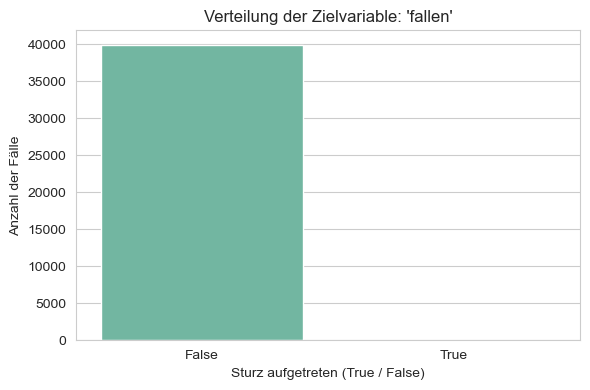

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Absolute Häufigkeiten
fall_counts = df["fallen"].value_counts(dropna=False)

# Relative Häufigkeiten in %
fall_percent = df["fallen"].value_counts(normalize=True, dropna=False) * 100

# Tabelle anzeigen
fall_summary = pd.DataFrame({
    "Anzahl": fall_counts,
    "Prozent": fall_percent.round(2)
})

print("📊 Verteilung der Zielvariable 'fallen':")
print(fall_summary)

# Balkendiagramm
# Balkendiagramm ohne FutureWarning
plt.figure(figsize=(6, 4))
sns.barplot(
    x=fall_counts.index.astype(str),
    y=fall_counts.values,
    hue=fall_counts.index.astype(str),  # Dummy Hue
    palette="Set2",
    legend=False
)
plt.title("Verteilung der Zielvariable: 'fallen'")
plt.xlabel("Sturz aufgetreten (True / False)")
plt.ylabel("Anzahl der Fälle")
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

# -> Highly imbalanced target variable will need special Sampling.


C:\Users\cljxx\AppData\Local\Temp\ipykernel_18272\165548051.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_table.iloc[:20, 0], y=missing_table.iloc[:20].index, palette="viridis")


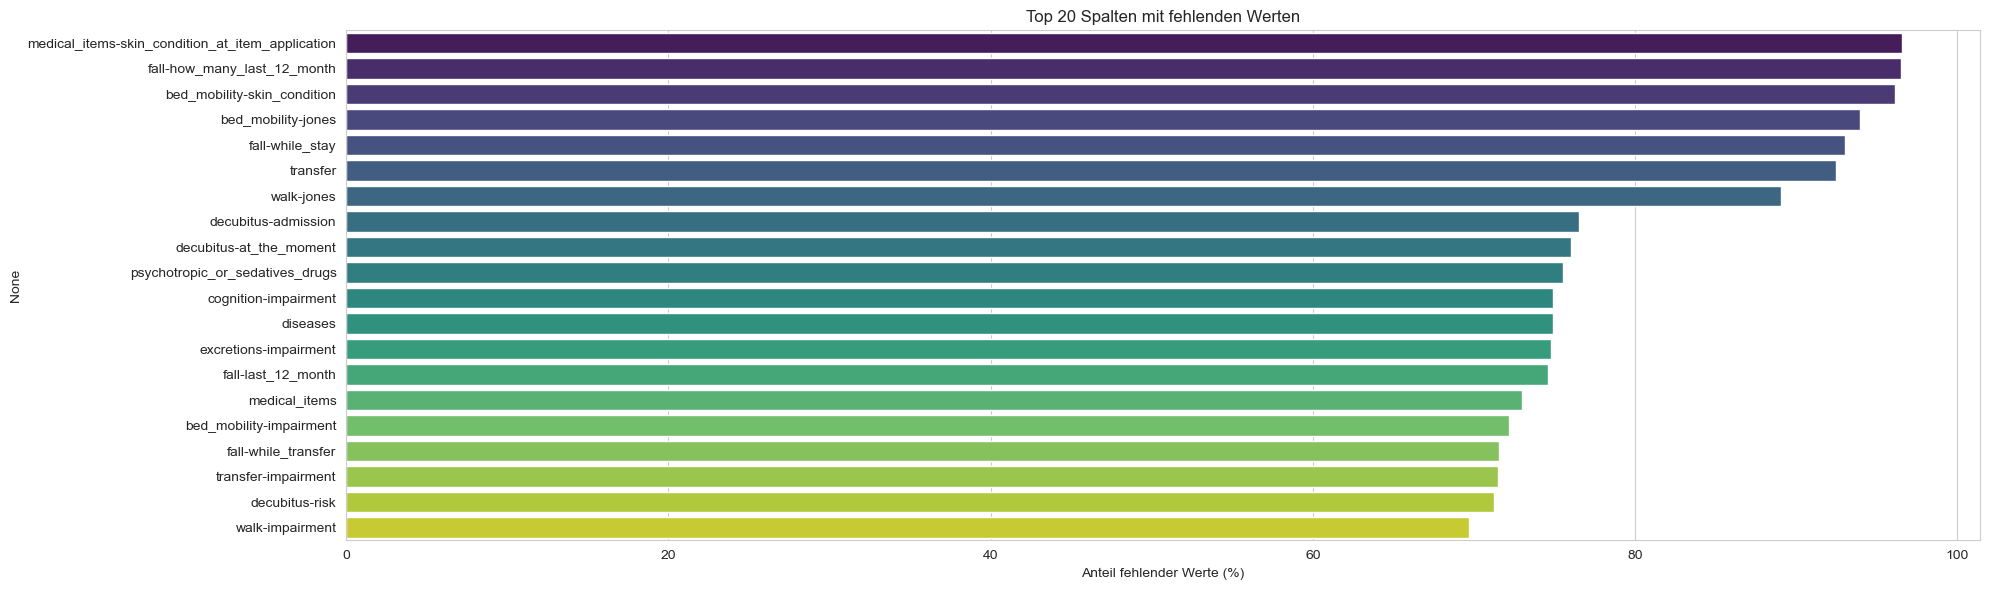

,Missing (%)
medical_items-skin_condition_at_item_application,96.5925
fall-how_many_last_12_month,96.5000
bed_mobility-skin_condition,96.1175
bed_mobility-jones,93.9825
fall-while_stay,93.0300
transfer,92.4850
walk-jones,89.0675
decubitus-admission,76.5025
decubitus-at_the_moment,76.0025
psychotropic_or_sedatives_drugs,75.5075


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fehlende Werte pro Spalte in Prozent
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100
missing_table = missing_percent[missing_percent > 0].to_frame(name="Missing (%)")

# Balkendiagramm der Top 20 Spalten mit fehlenden Werten
plt.figure(figsize=(20, 6))
sns.barplot(x=missing_table.iloc[:20, 0], y=missing_table.iloc[:20].index, palette="viridis")
plt.xlabel("Anteil fehlender Werte (%)")
plt.title("Top 20 Spalten mit fehlenden Werten")
plt.tight_layout()
plt.grid(True, axis='x')
plt.show()

# Tabelle optional anzeigen
display(missing_table)


In [6]:
 # 2. Flag Missing Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Stil für Diagramme
sns.set_style("whitegrid")

# Zielspalten laut deiner Analyse
columns_to_check = [
    "fall-how_many_last_12_month",
    "bed_mobility-jones",
    "walk-jones",
    "decubitus-risk",
    "fall-risk"
]

# Analyse-Schleife
for col in columns_to_check:
    print(f"\n📊 Übersicht für Spalte: {col}")
    print("-" * 50)
    
    # Fehlende Werte
    missing_pct = df[col].isna().mean() * 100
    print(f"🔹 Fehlende Werte: {missing_pct:.2f} %")

    # Anzahl eindeutiger Werte inkl. NaN
    unique_vals = df[col].nunique(dropna=False)
    print(f"🔹 Anzahl unterschiedlicher Werte (inkl. NaN): {unique_vals}")

    # Verteilung (inkl. NaN)
    print("\n🔸 Wertverteilung:")
    print(df[col].value_counts(dropna=False))

    # Visualisierung für kategoriale Merkmale
   # Visualisierung für kategoriale Merkmale (warnungsfrei)
if df[col].dtype.name == "category":
    plt.figure(figsize=(6, 3))
    sns.countplot(
        data=df,
        y=col,
        order=df[col].value_counts().index,
        hue=col,                  # dummy hue notwendig für palette
        palette="viridis",
        legend=False              # keine doppelte Legende nötig
    )
    plt.title(f"Wertverteilung: {col}")
    plt.xlabel("Anzahl")
    plt.tight_layout()
    plt.show()



📊 Übersicht für Spalte: fall-how_many_last_12_month
--------------------------------------------------
🔹 Fehlende Werte: 96.50 %
🔹 Anzahl unterschiedlicher Werte (inkl. NaN): 20

🔸 Wertverteilung:
fall-how_many_last_12_month
NaN         38600
1.000000     1122
5.000000      249
3.000000       11
2.000000        3
3.392226        1
2.748724        1
4.931584        1
3.100813        1
3.871862        1
3.659762        1
2.981188        1
1.257659        1
3.241220        1
4.396037        1
4.096168        1
2.013521        1
2.202339        1
4.453497        1
4.175363        1
Name: count, dtype: int64

📊 Übersicht für Spalte: bed_mobility-jones
--------------------------------------------------
🔹 Fehlende Werte: 93.98 %
🔹 Anzahl unterschiedlicher Werte (inkl. NaN): 6

🔸 Wertverteilung:
bed_mobility-jones
NaN    37593
2       1678
3        496
4A       139
1         89
4B         5
Name: count, dtype: int64

📊 Übersicht für Spalte: walk-jones
-----------------------------------------

In [ ]:
import sweetviz as sv

# Generate a Sweetviz report
report = sv.analyze(df)

# Display the report in the notebook
report.show_html("sweetviz_report.html")


In [7]:
# Crosstab mit relativen Häufigkeiten (Zeilenprozent)
def show_crosstab(col):
    print(f"\n📊 Verteilung von 'fallen' je Kategorie in: {col}")
    ct = pd.crosstab(df[col], df["fallen"], normalize="index") * 100
    display(ct.round(2))

# Analyse für ausgewählte kategoriale Merkmale
for cat_col in ["fall-risk", "decubitus-risk", "walk-jones", "bed_mobility-jones"]:
    if cat_col in df.columns:
        show_crosstab(cat_col)

# Entfernen der ID-Spalte, da sie keine nützliche Information enthält
if "id" in df.columns:
    df.drop(columns="id", inplace=True)
    print("🗑️ Spalte 'id' wurde entfernt (nur Identifikator, keine Modellrelevanz).")




📊 Verteilung von 'fallen' je Kategorie in: fall-risk


fallen,False,True
fall-risk,,
+,97.42,2.58
++,100.00,0.00
0,100.00,0.00



📊 Verteilung von 'fallen' je Kategorie in: decubitus-risk


fallen,False,True
decubitus-risk,,
+,97.77,2.23
++,97.70,2.30
0,99.90,0.10



📊 Verteilung von 'fallen' je Kategorie in: walk-jones


fallen,False,True
walk-jones,,
1,93.61,6.39
2,99.90,0.10
3,97.54,2.46
4A,95.88,4.12
4B,95.89,4.11



📊 Verteilung von 'fallen' je Kategorie in: bed_mobility-jones


fallen,False,True
bed_mobility-jones,,
1,93.26,6.74
2,99.88,0.12
3,96.98,3.02
4A,95.68,4.32
4B,100.00,0.00


1.2 ADJUSTING DATA

In [23]:
# 1. Change Data types (the reasoning must be documented)

import pandas as pd
import numpy as np

# Konvertierung von String zu Boolean (inkl. leere Zellen)
def to_boolean(val):
    if pd.isna(val) or str(val).strip() == "":
        return pd.NA
    val = str(val).strip().lower()
    if val == "true":
        return True
    elif val == "false":
        return False
    else:
        return pd.NA

# Typ-Mapping laut Aufgabenstellung
type_mapping = {
    'procedure': 'category',
    'diagnosis': 'category',
    'decubitus-admission': 'bool',
    'decubitus-at_the_moment': 'bool',
    'bed_mobility-impairment': 'bool',
    'bed_mobility-jones': 'category',
    'bed_mobility-skin_condition': 'bool',
    'transfer-impairment': 'bool',
    'transfer': 'category',
    'medical_items': 'bool',
    'medical_items-skin_condition_at_item_application': 'bool',
    'fall-last_12_month': 'bool',
    'fall-how_many_last_12_month': 'int64',
    'fall-while_stay': 'bool',
    'fall-while_transfer': 'bool',
    'walk-impairment': 'bool',
    'walk-jones': 'category',
    'excretions-impairment': 'bool',
    'cognition-impairment': 'bool',
    'psychotropic_or_sedatives_drugs': 'bool',
    'decubitus-risk': 'category',
    'fall-risk': 'category',
    'diseases': 'bool',
    'sex': 'category'
}

# Protokoll für Konvertierungsaktionen
conversion_log = []

#  Typkonvertierung
for col, new_type in type_mapping.items():
    if col in df.columns:
        original_len = len(df)
        try:
            if new_type == 'category':
                df[col] = df[col].astype('category')

            elif new_type == 'bool':
                df[col] = df[col].apply(to_boolean).astype("boolean")

            elif new_type == 'int64':
                df[col] = pd.to_numeric(df[col], errors='coerce')
                non_integer_mask = df[col].dropna().apply(lambda x: not float(x).is_integer())
                non_integer_indices = df[col].dropna()[non_integer_mask].index
                removed = len(non_integer_indices)
                df.drop(index=non_integer_indices, inplace=True)
                df[col] = df[col].astype("Int64")

                if removed > 0:
                    conversion_log.append(
                        f"Spalte '{col}': {removed} Zeilen mit ungültigen (nicht-ganzzahligen) Werten gelöscht."
                    )

            elif new_type == 'float':
                df[col] = pd.to_numeric(df[col], errors='coerce').astype('Float64')

            elif new_type == 'string':
                df[col] = df[col].astype("string")

        except Exception as e:
            conversion_log.append(f"Spalte '{col}': Fehler bei der Umwandlung – {str(e)}")

# ✅ Fehlende Werte in Boolean-Spalten durch False ersetzen
boolean_cols = df.select_dtypes(include="boolean").columns
df[boolean_cols] = df[boolean_cols].fillna(False)

# 🧾 Protokoll ausgeben
print("🧾 Umwandlungsprotokoll:")
for entry in conversion_log:
    print(" -", entry)

# 🧮 Übersicht anzeigen
df.info()

🧾 Umwandlungsprotokoll:
<class 'pandas.core.frame.DataFrame'>
Index: 39985 entries, 0 to 39999
Data columns (total 44 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   fallen                                            39985 non-null  bool    
 1   id                                                39985 non-null  int64   
 2   age                                               39985 non-null  int64   
 3   procedure                                         39985 non-null  category
 4   diagnosis                                         39985 non-null  category
 5   c_zriserh1                                        39985 non-null  bool    
 6   decubitus-at_the_moment                           39985 non-null  boolean 
 7   bed_mobility-impairment                           39985 non-null  boolean 
 8   bed_mobility-jones                                39985 non-null  c

In [24]:
# 1. Numerisch: NaN mit 0 ersetzen
# Neue Spalte: Angabe vorhanden oder nicht
df["fall-how_many_last_12_month_present"] = df["fall-how_many_last_12_month"].notna()

# NaNs durch 0 ersetzen
df["fall-how_many_last_12_month"] = df["fall-how_many_last_12_month"].fillna(0).astype("int64")

# 2. Kategorisch: NaN mit "unknown" ersetzen
columns_to_fill_unknown = [
    "bed_mobility-jones",
    "walk-jones",
    "transfer",
    "decubitus-risk",
    "fall-risk"
]

for col in columns_to_fill_unknown:
    df[col] = df[col].cat.add_categories("unknown")  # Kategorie "unknown" hinzufügena
    df[col] = df[col].fillna("unknown")              # NaN ersetzen


In [25]:
# 🧠 Ziel: Ordinale Features mit Mapping umwandeln, dabei unbekannte Werte ("unknown" oder ungemappte Werte) als -1 behandeln

ordinal_mappings = {
    "fall-risk": {
        "unknown": -1,
        "0": 0,
        "+": 1,
        "++": 2
    },
    "decubitus-risk": {
        "unknown": -1,
        "0": 0,
        "+": 1,
        "++": 2
    },
    "walk-jones": {
        "unknown": -1,
        "1": 1,
        "2": 2,
        "3": 3,
        "4A": 4
    },
    "bed_mobility-jones": {
        "unknown": -1,
        "1": 1,
        "2": 2,
        "3": 3,
        "4A": 4
    }
}

# ✅ Mapping mit Fehlervermeidung durch fillna(-1)
for col, mapping in ordinal_mappings.items():
    print(f"🔁 Mapping Spalte '{col}' mit: {mapping}")
    df[col] = df[col].astype(str).map(mapping).fillna(-1).astype("int64")
    print(f"✅ '{col}' erfolgreich konvertiert: dtype = {df[col].dtype}\n")



🔁 Mapping Spalte 'fall-risk' mit: {'unknown': -1, '0': 0, '+': 1, '++': 2}
✅ 'fall-risk' erfolgreich konvertiert: dtype = int64

🔁 Mapping Spalte 'decubitus-risk' mit: {'unknown': -1, '0': 0, '+': 1, '++': 2}
✅ 'decubitus-risk' erfolgreich konvertiert: dtype = int64

🔁 Mapping Spalte 'walk-jones' mit: {'unknown': -1, '1': 1, '2': 2, '3': 3, '4A': 4}
✅ 'walk-jones' erfolgreich konvertiert: dtype = int64

🔁 Mapping Spalte 'bed_mobility-jones' mit: {'unknown': -1, '1': 1, '2': 2, '3': 3, '4A': 4}
✅ 'bed_mobility-jones' erfolgreich konvertiert: dtype = int64



In [26]:
# Prüfen und entfernen, wenn nur False enthalten ist 
if "decubitus-admission" in df.columns:
    if df["decubitus-admission"].nunique(dropna=False) == 1 and df["decubitus-admission"].unique()[0] == False:
        df.drop(columns="decubitus-admission", inplace=True)
        print("🗑️ Spalte 'decubitus-admission' wurde entfernt (enthielt nur False).")

if "medical_items-A_V_system" in df.columns:
    if df["medical_items-A_V_system"].nunique(dropna=False) == 1 and df["medical_items-A_V_system"].unique()[0] == False:
        df.drop(columns="medical_items-A_V_system", inplace=True)
        print("🗑️ Spalte 'medical_items-A_V_system' wurde entfernt (enthielt nur False).")


In [27]:
# Einträge in Altersgruppen einteilen
age_bins = [0, 17, 30, 45, 60, 75, 90, np.inf]
age_labels = ['<18', '18-29', '30-44', '45-59', '60-74', '75-89', '90+']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
print("Altergruppen eingeteilt")

Altergruppen eingeteilt


In [ ]:
df['age_group'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Verteilung der Altersgruppen")
plt.xlabel("Altersgruppe")
plt.ylabel("Anzahl Personen")
plt.show()

1.3 OUTLIER HANDLING

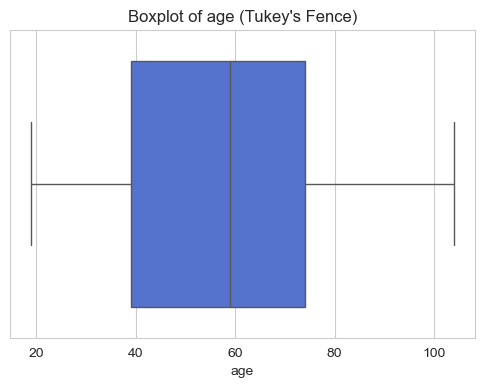

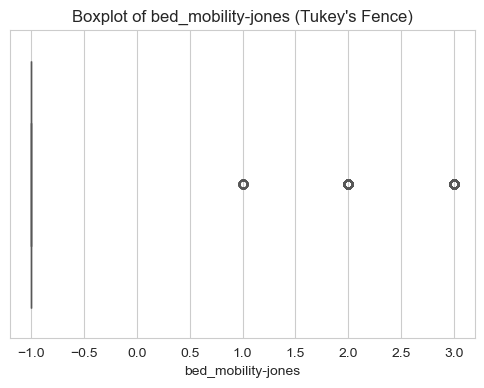

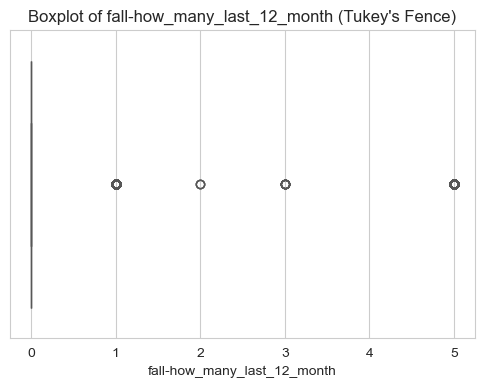

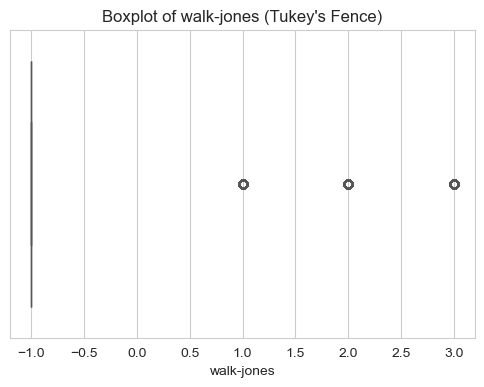

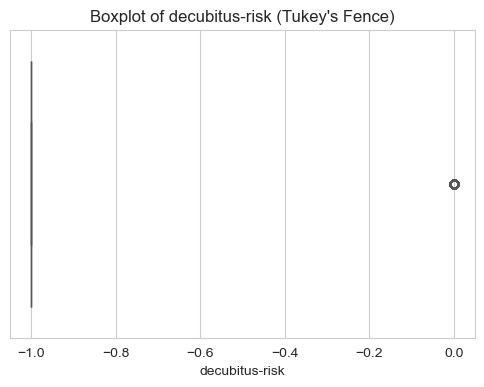

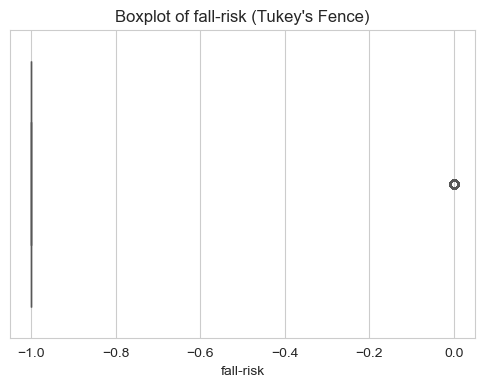

In [28]:
# outliers erkennen

# Nur numerische Spalten analysieren
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('id')  # funktioniert, wenn numeric_cols ein Index-Objekt ist


import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    col_data = df[col].dropna()
    
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_tukey = (col_data < lower) | (col_data > upper)

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col_data, color='royalblue')
    plt.xlabel(col)
    plt.title(f"Boxplot of {col} (Tukey's Fence)")
    plt.show()

In [22]:
# remove outliers??

<class 'pandas.core.frame.DataFrame'>
Index: 39985 entries, 0 to 39999
Data columns (total 44 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   fallen                                            39985 non-null  bool    
 1   id                                                39985 non-null  int64   
 2   age                                               39985 non-null  int64   
 3   procedure                                         39985 non-null  category
 4   diagnosis                                         39985 non-null  category
 5   c_zriserh1                                        39985 non-null  bool    
 6   decubitus-at_the_moment                           39985 non-null  boolean 
 7   bed_mobility-impairment                           39985 non-null  boolean 
 8   bed_mobility-jones                                39985 non-null  int64   
 9   bed_mobilit

In [36]:
# same for multivariant outliers

from sklearn.ensemble import IsolationForest
import pandas as pd

# ⚠️ Nur numerische Daten
X_numeric = df.select_dtypes(include='number')

# Isolation Forest initialisieren
iso = IsolationForest(contamination=0.01, random_state=42)  # 1% Outlier
outlier_labels = iso.fit_predict(X_numeric)

# Ergebnis zu df hinzufügen
df["outlier"] = (outlier_labels == -1).astype(int)  # 1 = Ausreißer, 0 = normal

# Ausreißer anzeigen
print(f"Anzahl multivariater Ausreißer: {df['outlier'].sum()}")
display(df[df["outlier"] == 1].head())


Anzahl multivariater Ausreißer: 400


,fallen,id,age,procedure,diagnosis,c_zriserh1,decubitus-at_the_moment,bed_mobility-impairment,bed_mobility-jones,bed_mobility-skin_condition,...,cognition-agitated,cognition-confused,psychotropic_or_sedatives_drugs,decubitus-risk,fall-risk,diseases,sex,age_group,fall-how_many_last_12_month_present,outlier
31,False,46993,89,3-73,S628,True,False,True,3,False,...,False,False,False,-1,-1,False,female,75-89,False,1
202,False,71552,89,5-85,K831,True,False,False,-1,False,...,False,False,False,-1,-1,False,male,75-89,True,1
218,False,67499,79,8-12,O714,True,False,False,-1,False,...,False,False,False,-1,-1,False,female,75-89,True,1
355,False,36902,74,8-11,H219,True,False,True,3,False,...,False,False,False,-1,-1,False,male,60-74,False,1
440,False,48649,94,3-76,S469,True,False,False,2,False,...,False,False,False,-1,-1,False,female,90+,True,1


In [ ]:
# remove outliers?

1.4 DATA SPLIT

In [37]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# 🎯 Zielvariable
target = "fallen"

# 📦 Features und Target aufteilen
X = df.drop(columns=target)
y = df[target]

# ✂️ Stratified Split: 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 🔎 Verteilungen vor dem Oversampling überprüfen
print("📊 Verteilung im gesamten Datensatz:")
print(y.value_counts(normalize=True) * 100)

print("\n📊 Verteilung im Trainingsset (vor Oversampling):")
print(y_train.value_counts(normalize=True) * 100)

print("\n📊 Verteilung im Testset:")
print(y_test.value_counts(normalize=True) * 100)

# 🔄 Oversampling (nur auf Trainingsdaten!)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# ✅ Ergebnis nach Oversampling
print("\n✅ Verteilung im Trainingsset (nach Oversampling):")
print(y_train_resampled.value_counts(normalize=True) * 100)


📊 Verteilung im gesamten Datensatz:
fallen
False    99.764912
True      0.235088
Name: proportion, dtype: float64

📊 Verteilung im Trainingsset (vor Oversampling):
fallen
False    99.765537
True      0.234463
Name: proportion, dtype: float64

📊 Verteilung im Testset:
fallen
False    99.762411
True      0.237589
Name: proportion, dtype: float64

✅ Verteilung im Trainingsset (nach Oversampling):
fallen
False    50.0
True     50.0
Name: proportion, dtype: float64


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39985 entries, 0 to 39999
Data columns (total 46 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   fallen                                            39985 non-null  bool    
 1   id                                                39985 non-null  int64   
 2   age                                               39985 non-null  int64   
 3   procedure                                         39985 non-null  category
 4   diagnosis                                         39985 non-null  category
 5   c_zriserh1                                        39985 non-null  bool    
 6   decubitus-at_the_moment                           39985 non-null  boolean 
 7   bed_mobility-impairment                           39985 non-null  boolean 
 8   bed_mobility-jones                                39985 non-null  int64   
 9   bed_mobilit

In [39]:
# EXPORT DATA FOR NOW
df.to_csv("../data/falls_after_step1.csv", index=False)